<a href="https://colab.research.google.com/github/tracedence/deep-learning-vision/blob/main/cifar10_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## data loading

In [4]:
import torchvision
import torchvision.transforms as transforms

In [5]:
trainset = torchvision.datasets.CIFAR10(root='./data', download=True, train=True, transform=transforms.ToTensor())

100%|██████████| 170498071/170498071 [00:10<00:00, 15609293.56it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
# shuffle for random
# batch_size: no. of images
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [8]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 32, 32]) torch.Size([4])
torch.Size([3, 32, 32])
8


<class 'torch.Tensor'>
torch.Size([3, 32, 32])
(3, 32, 32)
(32, 32, 3)


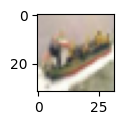

In [9]:
img = images[0]
print(type(img))
print(img.shape)
numpyimage = img.numpy()
print(numpyimage.shape)
numpy_transpose_image = np.transpose(numpyimage, (1, 2, 0))
print(numpy_transpose_image.shape)
## view the image
plt.figure(figsize=(1,1))
plt.imshow(numpy_transpose_image)
plt.show()

In [10]:
def show_image(array):
  numpy_image = array.numpy()
  numpy_transpose_image = np.transpose(numpy_image, (1,2, 0))
  plt.imshow(numpy_transpose_image)
  plt.show()

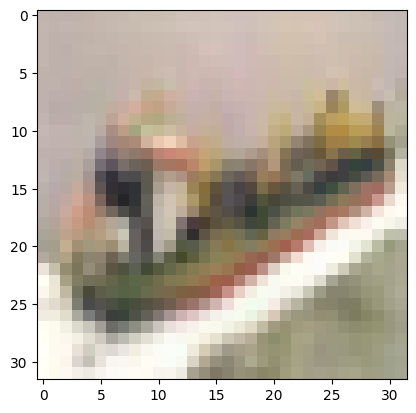

torch.Size([3, 36, 138])
ship automobile ship airplane


In [11]:
show_image(images[0])
## make grid will combine all images as single array and attach border around each image.
print(torchvision.utils.make_grid(images).shape)
# show_image(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

## single convolution layer

In [12]:
import torch.nn as nn
class FirstCNN(nn.Module):
  def __init__(self,):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 16, 3)

  def forward(self, x):
    x = self.conv1(x)
    return x

In [13]:
net = FirstCNN()
out = net(images)
out.shape

torch.Size([4, 16, 30, 30])

In [14]:
out[0].shape

torch.Size([16, 30, 30])

In [15]:
def plot_cnn_features(out):
  for i in range(out.shape[0]):
    first_image = out[i]
    print(first_image.shape)
    first_image = first_image.unsqueeze(1)
    grid = torchvision.utils.make_grid(first_image)
    print(grid.shape)
    # Convert the grid tensor to a numpy array and plot it
    grid_np = grid.permute(1, 2, 0).detach().cpu().numpy()  # [C, H, W] -> [H, W, C]
    print(grid_np.shape)
    # Plot the grid
    plt.imshow(grid_np)
    plt.axis('off')  # Hide the axes
    plt.show()

torch.Size([16, 30, 30])
torch.Size([3, 66, 258])
(66, 258, 3)


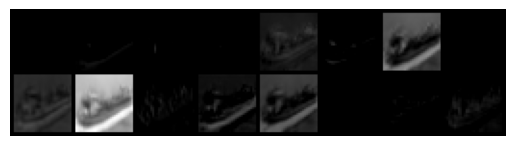

torch.Size([16, 30, 30])
torch.Size([3, 66, 258])
(66, 258, 3)


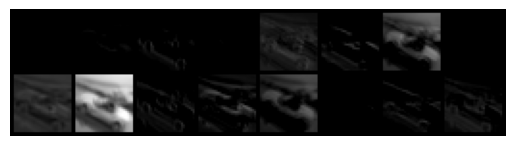

torch.Size([16, 30, 30])
torch.Size([3, 66, 258])
(66, 258, 3)


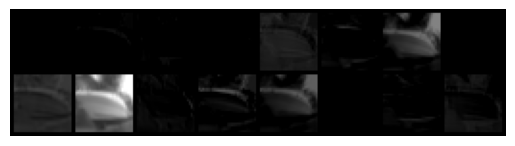

torch.Size([16, 30, 30])
torch.Size([3, 66, 258])
(66, 258, 3)


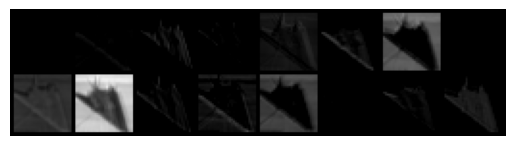

In [16]:
plot_cnn_features(out)

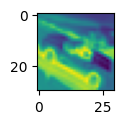

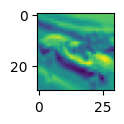

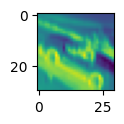

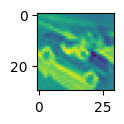

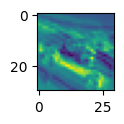

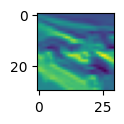

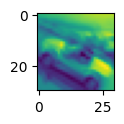

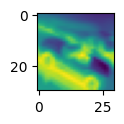

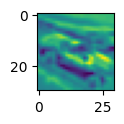

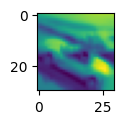

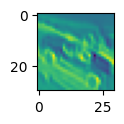

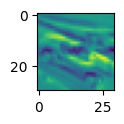

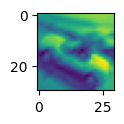

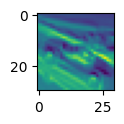

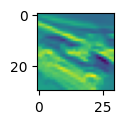

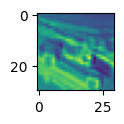

In [17]:
# show_image(out[0][0])
for i in range(out[0].shape[0]):
  plt.figure(figsize = (1,1))
  plt.imshow(out[1][i].detach().numpy())
  plt.show()


In [18]:
##

## net parameters

In [19]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


## deep convolution network

In [20]:
class FirstCNN_v2(nn.Module):

  def __init__(self,):
    super().__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3,8,3), #(N, 3, 32, 32) -> (N, 8, 30, 30)
        nn.Conv2d(8, 16, 3) # (N, 8, 30, 30) -> (N, 16, 28, 28)
    )

  def forward(self,x):
    x = self.model(x)
    return x

In [21]:
net = FirstCNN_v2()
out = net.forward(images)

torch.Size([16, 28, 28])
torch.Size([3, 62, 242])
(62, 242, 3)


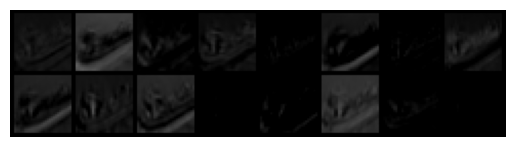

torch.Size([16, 28, 28])
torch.Size([3, 62, 242])
(62, 242, 3)


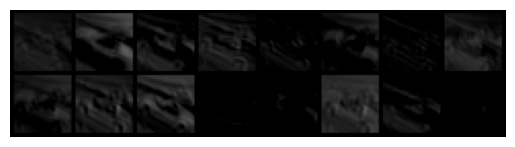

torch.Size([16, 28, 28])
torch.Size([3, 62, 242])
(62, 242, 3)


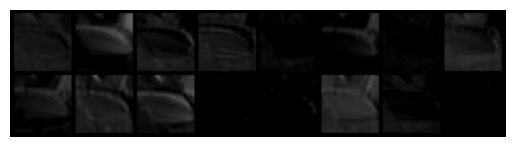

torch.Size([16, 28, 28])
torch.Size([3, 62, 242])
(62, 242, 3)


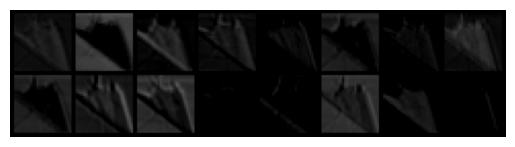

In [22]:
plot_cnn_features(out)

In [23]:
class FirstCNN_v3(nn.Module):

  def __init__(self,):
    super().__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 6, 5), #(N, 3, 32, 32) -> (N, 6, 28, 28)
        nn.AvgPool2d(2, stride=2), # (N, 6, 28, 28) -> (N, 6, 14, 14)
        nn.Conv2d(6,16, 3), #(N, 6, 14, 14) -> (N, 16, 12, 12)
        nn.AvgPool2d(2, stride=2), #(N, 16, 12, 12) --> (N, 16, 6, 6)
    )
  def forward(self, x):
    return self.model(x)

In [24]:
net = FirstCNN_v3()
out = net.forward(images)

In [25]:
out.shape

torch.Size([4, 16, 6, 6])

torch.Size([16, 6, 6])
torch.Size([3, 18, 66])
(18, 66, 3)


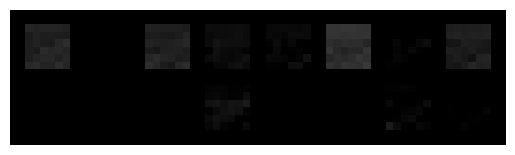

torch.Size([16, 6, 6])
torch.Size([3, 18, 66])
(18, 66, 3)


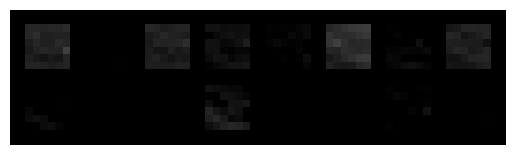

torch.Size([16, 6, 6])
torch.Size([3, 18, 66])
(18, 66, 3)


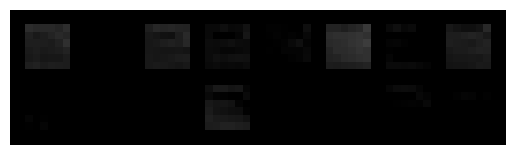

torch.Size([16, 6, 6])
torch.Size([3, 18, 66])
(18, 66, 3)


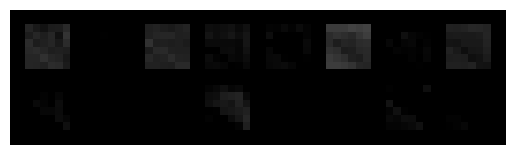

In [26]:
plot_cnn_features(out)

#LeNet

In [67]:
class LeNet(nn.Module):

  def __init__(self,):
    super().__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5), #(N, 3, 32, 32) -> (N, 6, 28, 28)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2), #(N, 6, 28, 28) -> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5), #(N, 6, 14,14) -> (N, 16, (10, 10))
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2) # (N, 16, 10, 10) -> (N, 16, 5, 5)
    )

    self.fc_model = nn.Sequential(
        nn.Linear(400,120),
        nn.Tanh(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )

  def forward(self, x):
    x = self.cnn_model(x)
    # print(x.shape)
    x = x.view(x.size(0), -1)
    # print(x.shape)
    x = self.fc_model(x)
    # print(x.shape)
    return x


In [68]:
model = LeNet()
out = model(images)

In [69]:
max_value, pred_class = torch.max(out.data, 1)
print(max_value)
print(pred_class)
print(labels)

tensor([0.1533, 0.1583, 0.1533, 0.1355])
tensor([1, 1, 1, 1])
tensor([4, 9, 2, 3, 7, 4, 8, 4, 7, 9, 7, 4, 8, 1, 7, 3, 6, 3, 1, 2, 3, 3, 6, 3,
        8, 4, 4, 6, 2, 6, 7, 9, 1, 5, 8, 9, 9, 0, 1, 5, 5, 0, 1, 6, 4, 3, 9, 5,
        4, 0, 6, 1, 2, 7, 6, 9, 8, 5, 7, 7, 8, 8, 4, 3, 6, 5, 3, 3, 8, 6, 9, 2,
        3, 3, 7, 6, 7, 3, 2, 4, 2, 0, 1, 2, 9, 2, 1, 0, 8, 5, 6, 4, 2, 8, 1, 6,
        6, 6, 2, 8, 5, 6, 1, 7, 9, 0, 8, 0, 9, 3, 5, 7, 1, 9, 7, 6, 9, 3, 3, 0,
        1, 6, 8, 0, 2, 7, 4, 1])


## training LeNet

In [70]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [71]:
def evalution(dataloader, model):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    outputs = model.forward(inputs)
    _, preds = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (preds == labels).sum().item()
  return 100 * correct/total


## initial model

In [72]:
net = LeNet()

## loss function

In [73]:
loss_fn = nn.CrossEntropyLoss()

## optimizer

In [74]:
import torch.optim as optim
opt = optim.Adam(net.parameters())

In [75]:
trainloader

## training

test evaluation 55.63
test evaluation 54.76
test evaluation 56.08
test evaluation 55.55
test evaluation 55.82
test evaluation 55.48
test evaluation 56.12
test evaluation 55.16
test evaluation 55.08
test evaluation 55.88


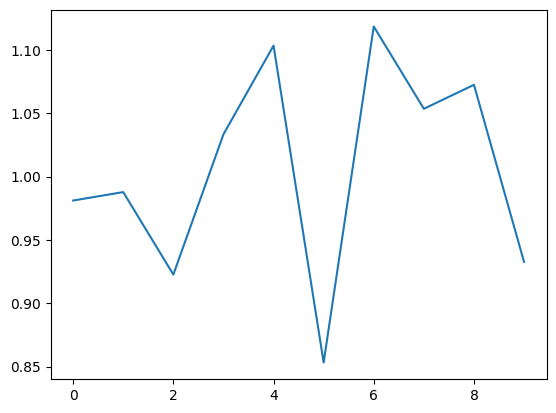

In [79]:
loss_epoch_arr = []
max_epochs = 10
for epoch in range(max_epochs):
  epoch_loss = 0
  for i, data in enumerate(trainloader):
    inputs, labels = data
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    epoch_loss = loss.item()
    # loss_arr.append(loss.item())
  loss_epoch_arr.append(epoch_loss)
  print("test evaluation", evalution(testloader, net))
plt.plot(loss_epoch_arr)